In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
N1 = 100
r = np.random.uniform(0,1,N1)
theta = np.random.uniform(0,1,N1)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX1 = r*[np.cos(theta), np.sin(theta)]
dataX1 = np.transpose(dataX1)
dataY1 = np.ones((N1))
N2 = 200
r = np.random.uniform(2,3,N2)
theta = np.random.uniform(0,1,N2)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX2 = r*[np.cos(theta), np.sin(theta)]
dataX2 = np.transpose(dataX2)
dataY2 = -np.ones((N2))

In [4]:
dataX = np.concatenate((dataX1,dataX2),axis = 0)
print(dataX.shape)
dataY = np.concatenate((dataY1,dataY2),axis = 0)
print(dataY.shape)

(300, 2)
(300,)


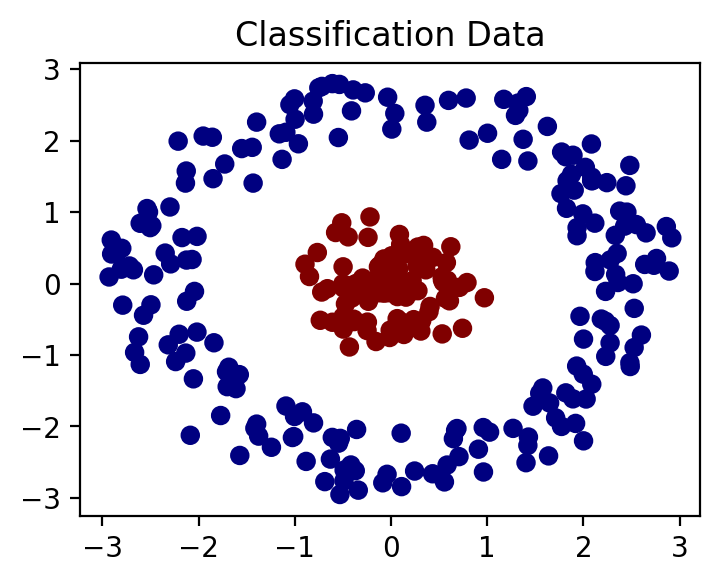

In [5]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY[:], cmap= 'jet')
plt.title('Classification Data')
plt.show()

## ResNet with Tensorflow $n = 5$

In [100]:
tf.reset_default_graph()

In [101]:
n_inputs = 2
n_hidden = 2 
n_outputs = 1 

In [102]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape = (None), name = "y")

In [103]:
def ResNet_neuron_layer(X, n_neurons, name):
    with tf.name_scope(name):
        U = tf.Variable(tf.random_normal([2, 1]), name = "inner_weights")
        u = tf.Variable(tf.random_normal([1]), name = "bias")
        V = tf.Variable(tf.random_normal([1, 2]), name = "outer_weights")
        temp = tf.nn.relu(tf.add(tf.matmul(X,U),u))
        temp = tf.matmul(temp, V)
        return tf.add(temp,X)

In [104]:
def last_layer(X, name):
    with tf.name_scope(name):
        A = tf.Variable(tf.random_normal([2, 1]), name = "last_layer")
        return tf.nn.sigmoid(tf.matmul(X,A))

In [105]:
with tf.name_scope("dnn"):
    hidden1 = ResNet_neuron_layer(X, n_hidden, "hidden1")
    hidden2 = ResNet_neuron_layer(hidden1, n_hidden, "hidden2")
    hidden3 = ResNet_neuron_layer(hidden2, n_hidden, "hidden3")
    hidden4 = ResNet_neuron_layer(hidden3, n_hidden, "hidden4")
    hidden5 = ResNet_neuron_layer(hidden4, n_hidden, "hidden5")
    logits = last_layer(hidden5, "outputs")

In [106]:
# define the logistic loss function 
#loss = tf.reduce_mean(tf.log(1.0 + tf.exp(- tf.multiply(tf.cast(y,tf.float32), logits))))
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels= tf.cast(y, tf.float32)))            

In [107]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [108]:
with tf.name_scope("eval"):
    predicted = tf.math.sign(logits + 0.001)
    correct_pred = tf.equal(tf.cast(tf.round(predicted),tf.int32), tf.cast(y, tf.int32))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [109]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [110]:
n_epochs = 400

with tf.Session() as sess:
    init.run()
    loss_history, accuracy_history = [], []
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict = {X: dataX, y: dataY})
        
        l = sess.run(loss, feed_dict = {X: dataX, y: dataY})
        accu = sess.run(accuracy, feed_dict = {X: dataX, y:dataY})
        
        loss_history.append(l)
        accuracy_history.append(accu)
        
        # Display result on curren Epoch
        if epoch %100 == 0 and epoch != 0:
            print("Epoch\n" + str(epoch) + "Loss:\n"+ str(l))
            print("Epoch\n" + str(epoch) + "Accuracy:\n" + str(accu))
            
    save_path = saver.save(sess, "./ResNet_5.ckpt")
            
    

Epoch
100Loss:
0.7017991
Epoch
100Accuracy:
0.33333334
Epoch
200Loss:
0.69560033
Epoch
200Accuracy:
0.33333334
Epoch
300Loss:
0.69428957
Epoch
300Accuracy:
0.33333334


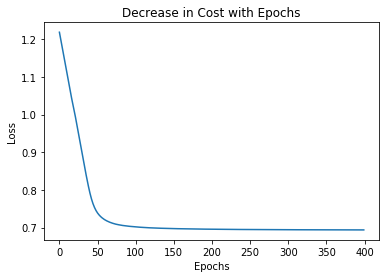

In [111]:
plt.plot(list(range(n_epochs)), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Decrease in Cost with Epochs')
plt.show()

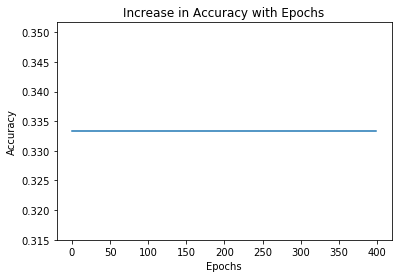

In [112]:
plt.plot(list(range(n_epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()

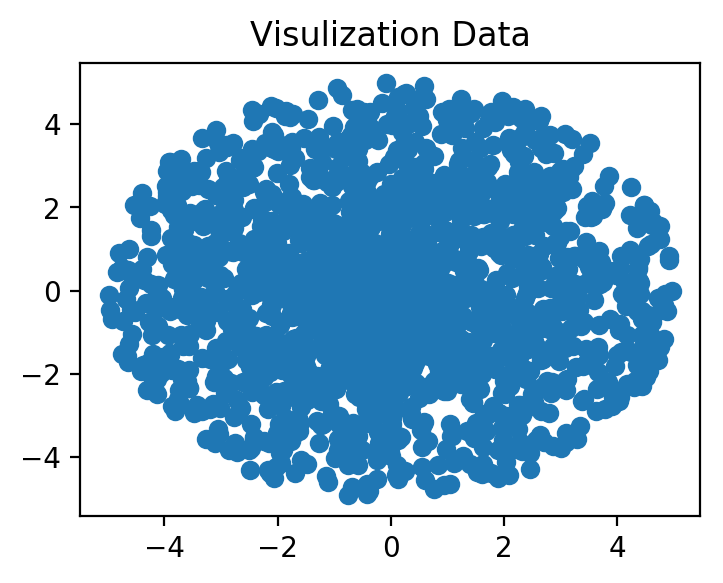

In [113]:
# Randomly generate 2000 points in the ball B(0,5)
N = 2000
r = np.random.uniform(0,5,N)
theta = np.random.uniform(0,5,N)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataXv = r*[np.cos(theta), np.sin(theta)]
dataXv = np.transpose(dataXv)

fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataXv[:, 0], dataXv[:, 1])
plt.title('Visulization Data')
plt.show()

In [114]:
with tf.Session() as sess:
    saver.restore(sess, "./ResNet_5.ckpt")
    logits_yv = logits.eval(feed_dict = {X: dataXv})
    yv_pred = predicted.eval(feed_dict = {X: dataXv})

INFO:tensorflow:Restoring parameters from ./ResNet_5.ckpt


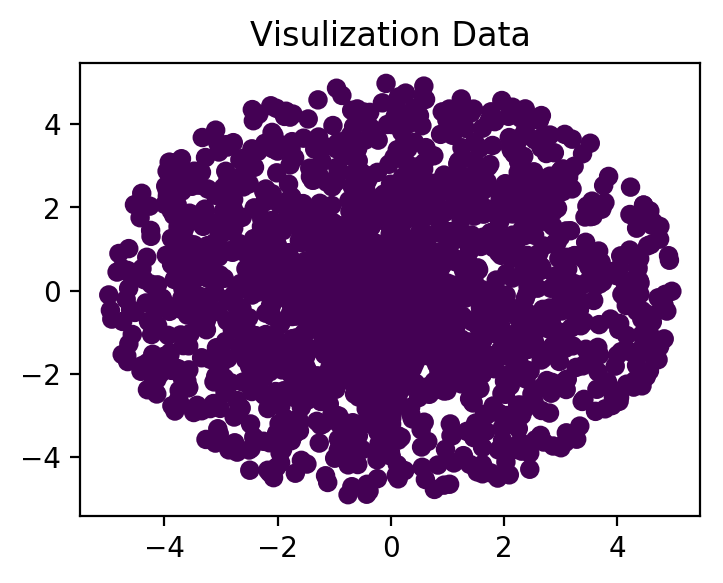

In [115]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataXv[:, 0], dataXv[:, 1], c = yv_pred[:,0])
plt.title('Visulization Data')
plt.show()